<a href="https://colab.research.google.com/github/savvyws/Data-Mining-Project-Midterm-Final-/blob/main/Correlation_Based_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CFS technique


Correlation-based Feature Selection (CFS) คือฟีเจอร์ชนิดหนึ่งที่นำการคำนวณเชิงสถิติ (Correlation)มาใช้ลดปริมาณ dimension ของชุดข้อมูล (Dimension Reduction) โดยการลดปริมาณจะต้องคำนึงถึงคุณสมบัติของตัว attribute ด้วย

---


คุณสมบัติดังต่อไปนี้จะสามารถตัด attribute ออกได้

1.   **attribute เป็น  independent variable (X-axis)** เราไม่ควรตัด attribute ที่เป็น target variable (Y-axis)เพราะจะทำให้การวิเคราะห์ข้อมูลไม่มีความหมาย
2.   **มีความ correlation สูง เมื่อเทียบกับ independent variable ตัวอื่นๆ** นั่นหมายความว่า attributes มีความสัมพันธ์กันสูง (ตามหลักแล้ว independent variable ไม่ควรมีความสัมพันธ์สูงเพราะจะทำให้ชุดข้อมูลทำนายค่า target ผิดพลาด) โดยคณะผู้จัดทำมีเกณฑ์ค่าความสัมพันธ์ ดังนี้



 ** when correlation (r) -->  |r| **
* 0.0 to 0.1: (แทบจะ)ไม่มีความสัมพันธ์ต่อกัน
* 0.1 to 0.3: ความสัมพันธ์ต่ำ
* 0.3 to 0.5: ความสัมพันธ์ปานกลาง
* 0.5 to 0.7: ความสัมพันธ์ค่อนข้างสูง
* 0.7 to 1.0: ความสัมพันธ์สูงมาก

3. **มีความ correlation ต่ำเมื่อเทียบกับ target variable** การตัด independent variable ที่มีความสัมพันธ์สูงต่อ target อาจทำให้ การวิเคราะห์ข้อมูลคาดเคลื่อน ดังนั้นหาก attribute นั้นมีค่าความสัมพันธ์ต่อ target ต่ำและมีค่าความสัมพันต่อ independent variable ตัวอื่นสูงจึงสามารถตัดออกได้

#CarPrice Prediction Using CFS preprocess


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [ ]:
data = pd.read_csv('/content/CarPrice_Assignment.csv')

##EDA Dataset before pre_processing

In [ ]:
print(data.dtypes)
data.shape

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


(205, 26)

In [ ]:
data2 = data.select_dtypes(include='number')

In [ ]:
data2.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


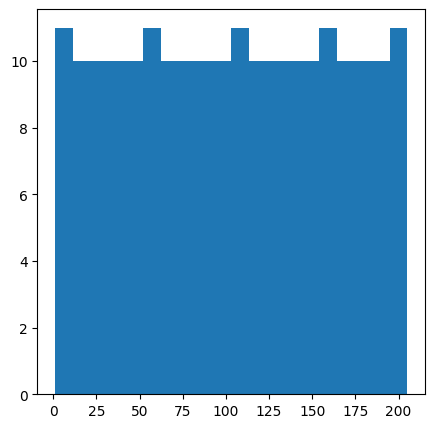

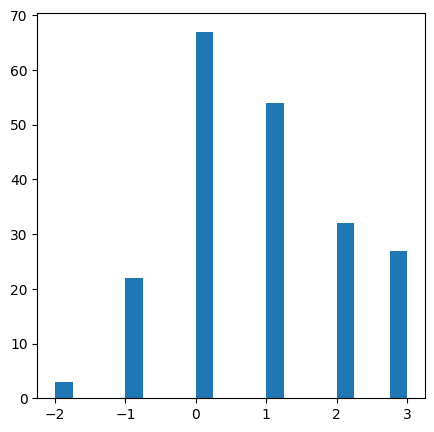

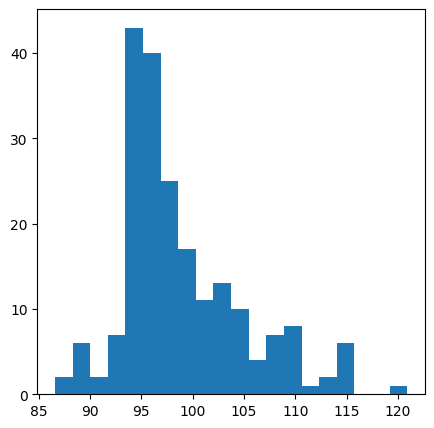

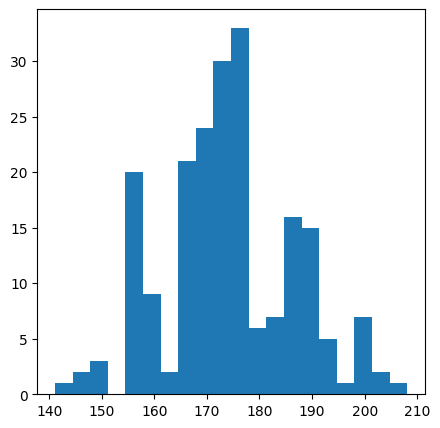

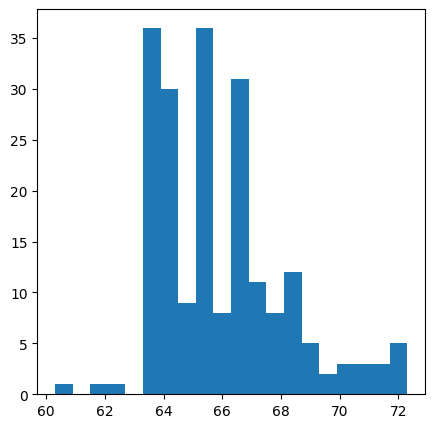

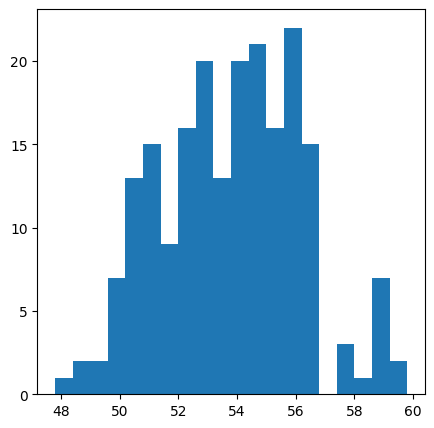

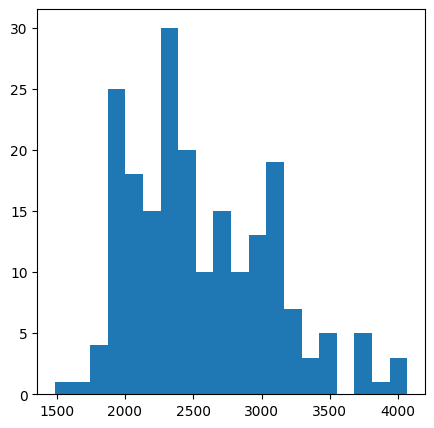

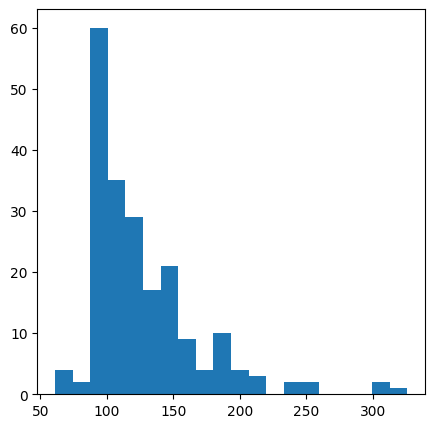

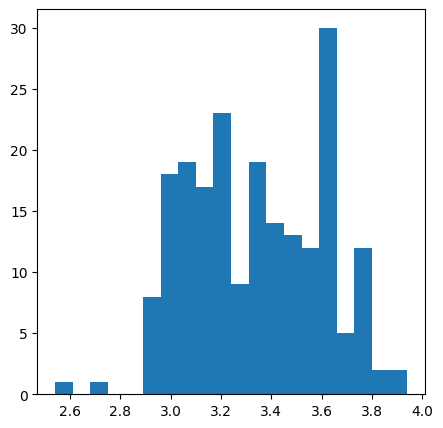

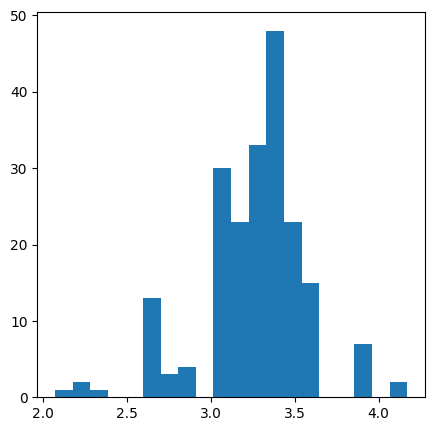

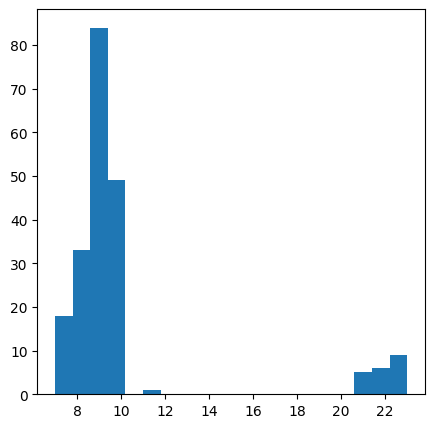

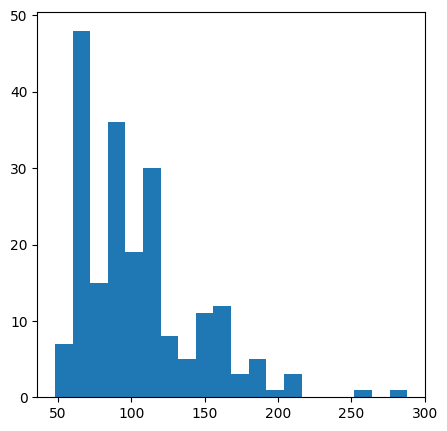

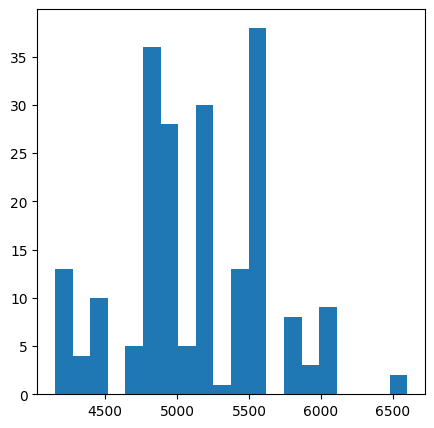

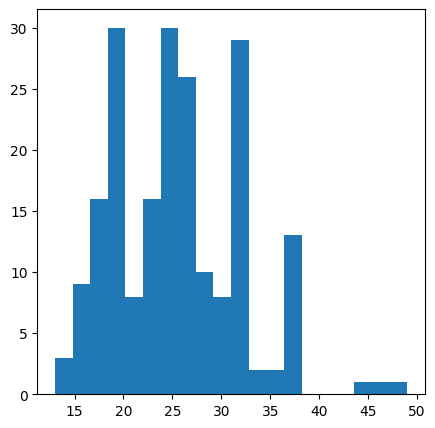

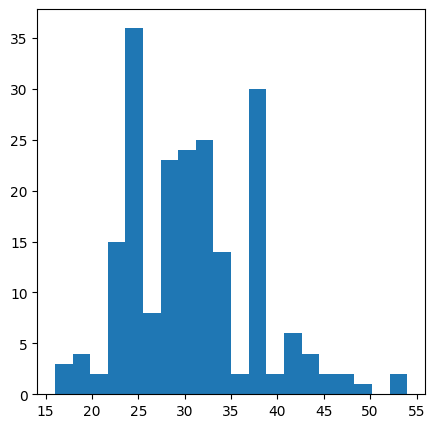

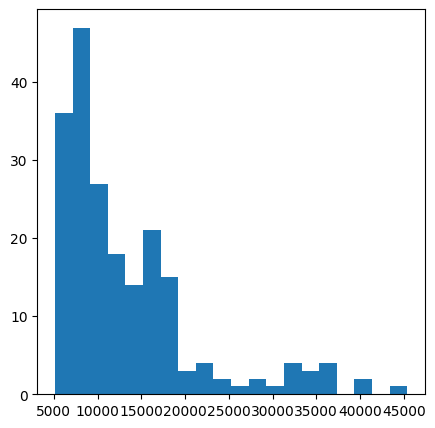

In [ ]:
for i in data2.columns:
  plt.figure(figsize=(5,5))
  plt.hist(data2[i],bins=20)
  plt.show()

Text(74.44444444444444, 0.5, 'Count')

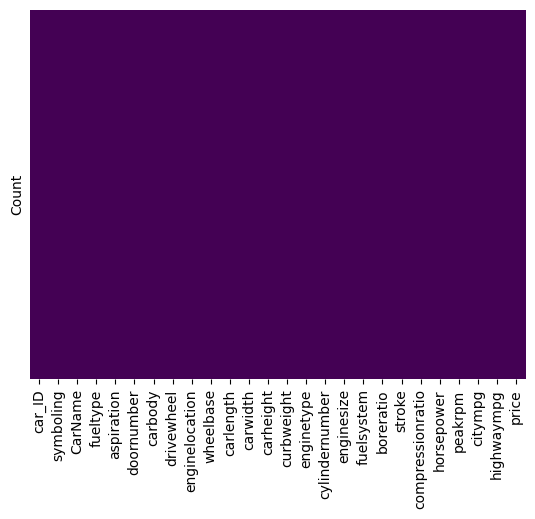

In [ ]:
sn.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.ylabel('Count', fontsize=10)

In [ ]:
def find_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR  # Corrected: Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR  # Corrected: Q3 + 1.5 * IQR
    count = 0
    for i in data[col]:
        if i < lower or i > upper:
            count += 1
    print(f"{col} has {count} outliers")



# Apply the outlier detection function to each column
for col in data2.select_dtypes(include=['float64', 'int64']).columns:
    find_outliers(data2, col)


car_ID has 0 outliers
symboling has 0 outliers
wheelbase has 3 outliers
carlength has 1 outliers
carwidth has 8 outliers
carheight has 0 outliers
curbweight has 0 outliers
enginesize has 10 outliers
boreratio has 0 outliers
stroke has 20 outliers
compressionratio has 28 outliers
horsepower has 6 outliers
peakrpm has 2 outliers
citympg has 2 outliers
highwaympg has 3 outliers
price has 15 outliers


##Preprocessing data with CFS

In [ ]:
#transform categorical to numerical first because we not sure that categorical variable are relevant or not

#label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to categorical columns
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

# Display the transformed dataframe.head()
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data['price'].mean()

13276.710570731706

                    car_ID  symboling   CarName  fueltype  aspiration  \
car_ID            1.000000  -0.151621  0.967077 -0.125568    0.067729   
symboling        -0.151621   1.000000 -0.107095  0.194311   -0.059866   
CarName           0.967077  -0.107095  1.000000 -0.069435    0.019914   
fueltype         -0.125568   0.194311 -0.069435  1.000000   -0.401397   
aspiration        0.067729  -0.059866  0.019914 -0.401397    1.000000   
doornumber       -0.190352   0.664073 -0.171745  0.191491   -0.031792   
carbody           0.098303  -0.596135  0.099691 -0.147853    0.063028   
drivewheel        0.051406  -0.041671 -0.016129 -0.132257    0.066465   
enginelocation    0.051483   0.212471  0.055968  0.040070   -0.057191   
wheelbase         0.129729  -0.531954  0.014550 -0.308346    0.257611   
carlength         0.170636  -0.357612  0.053016 -0.212679    0.234539   
carwidth          0.052387  -0.232919 -0.075349 -0.233880    0.300567   
carheight         0.255960  -0.541038  0.201900 -0.

<Axes: >

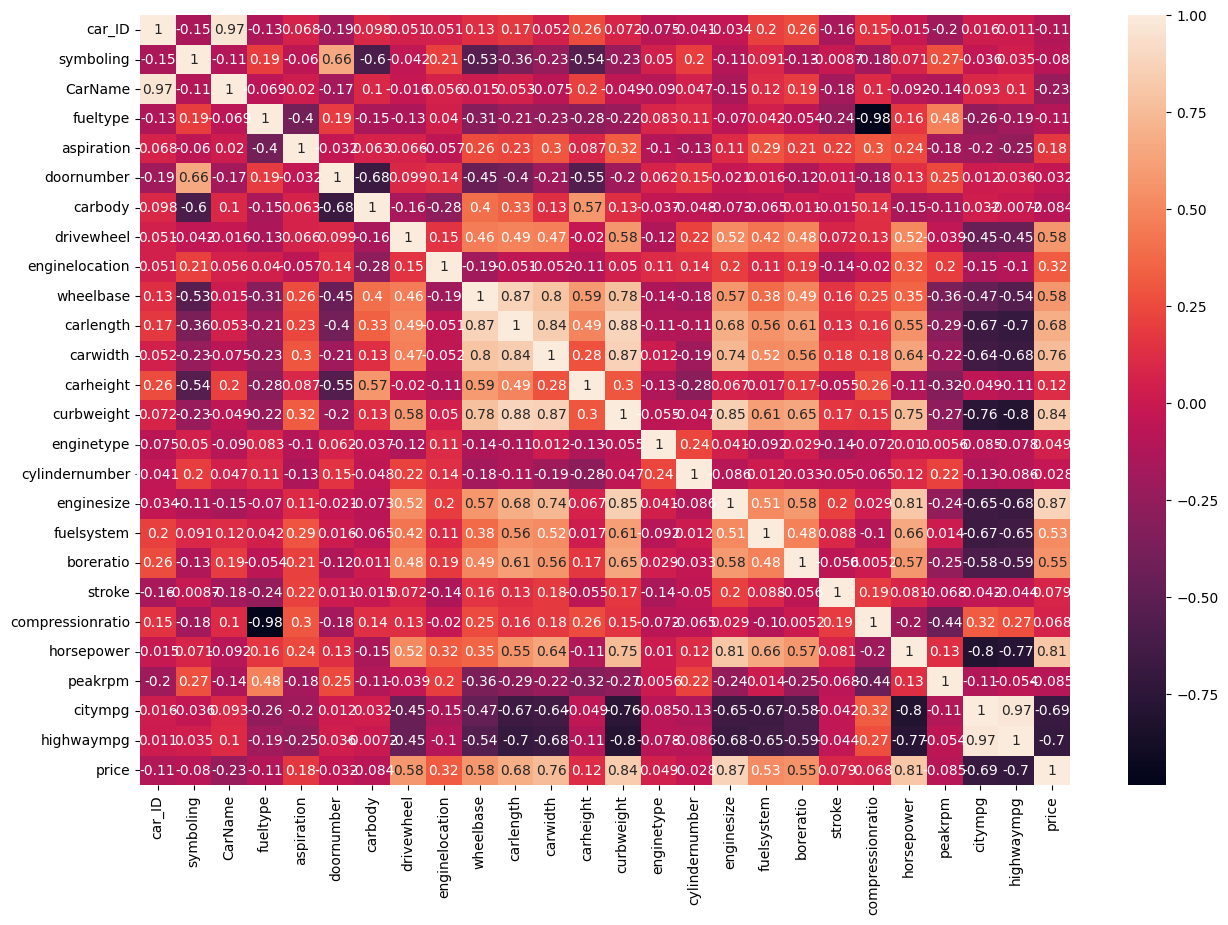

In [ ]:
corr_matrix = data.corr().T
print(corr_matrix)
#Using heatmap to visualize the correlation matrix
plt.figure(figsize=(15,10))
sn.heatmap(corr_matrix, annot=True)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

###CFS Threshold=0.7

In [ ]:
corr_features_1 = correlation(data, 0.7)
len(set(corr_features_1))

10

In [ ]:
corr_features_1

{'CarName',
 'carlength',
 'carwidth',
 'citympg',
 'compressionratio',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower',
 'price'}

In [ ]:
target=corr_matrix.columns[25]
target

'price'

In [ ]:
col_corr=[]
for j in range(len(corr_matrix.columns)):
    if abs(corr_matrix.iloc[25, j]) > 0.7: # we are interested in absolute coeff value
                colname = corr_matrix.columns[j]  # getting the name of column
                col_corr.append(colname)
print(col_corr)

['carwidth', 'curbweight', 'enginesize', 'horsepower', 'price']


In [ ]:
drop_col=[]
for i in corr_features_1:
  if i not in col_corr:
    drop_col.append(i)
drop_col

['citympg', 'highwaympg', 'compressionratio', 'CarName', 'carlength']

In [ ]:
data_corr1= data.drop(drop_col,axis=1)
data_corr1.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,price
0,1,3,1,0,1,0,2,0,88.6,64.1,...,2548,0,2,130,5,3.47,2.68,111,5000,13495.0
1,2,3,1,0,1,0,2,0,88.6,64.1,...,2548,0,2,130,5,3.47,2.68,111,5000,16500.0
2,3,1,1,0,1,2,2,0,94.5,65.5,...,2823,5,3,152,5,2.68,3.47,154,5000,16500.0
3,4,2,1,0,0,3,1,0,99.8,66.2,...,2337,3,2,109,5,3.19,3.40,102,5500,13950.0
4,5,2,1,0,0,3,0,0,99.4,66.4,...,2824,3,1,136,5,3.19,3.40,115,5500,17450.0


###CFS Threshold=0.85

In [ ]:
corr_features_2 = correlation(data, 0.85)
print(len(set(corr_features_2)))

col_corr=[]
for j in range(len(corr_matrix.columns)):
    if abs(corr_matrix.iloc[25, j]) > 0.85:
                colname = corr_matrix.columns[j]
                col_corr.append(colname)
print(col_corr)

drop_col=[]
for i in corr_features_2:
  if i not in col_corr:
    drop_col.append(i)
print(drop_col)
data_corr2 = data.drop(drop_col,axis=1)
data_corr2.head()

7
['enginesize', 'price']
['curbweight', 'highwaympg', 'compressionratio', 'CarName', 'carlength']


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,citympg,price
0,1,3,1,0,1,0,2,0,88.6,64.1,...,0,2,130,5,3.47,2.68,111,5000,21,13495.0
1,2,3,1,0,1,0,2,0,88.6,64.1,...,0,2,130,5,3.47,2.68,111,5000,21,16500.0
2,3,1,1,0,1,2,2,0,94.5,65.5,...,5,3,152,5,2.68,3.47,154,5000,19,16500.0
3,4,2,1,0,0,3,1,0,99.8,66.2,...,3,2,109,5,3.19,3.40,102,5500,24,13950.0
4,5,2,1,0,0,3,0,0,99.4,66.4,...,3,1,136,5,3.19,3.40,115,5500,18,17450.0


##EDA Dataset After Pre_Processing

In [ ]:
data_corr2.dtypes

,0
car_ID,int64
symboling,int64
fueltype,int64
aspiration,int64
doornumber,int64
carbody,int64
drivewheel,int64
enginelocation,int64
wheelbase,float64
carwidth,float64


In [ ]:
data_corr2.shape

(205, 21)

<Axes: >

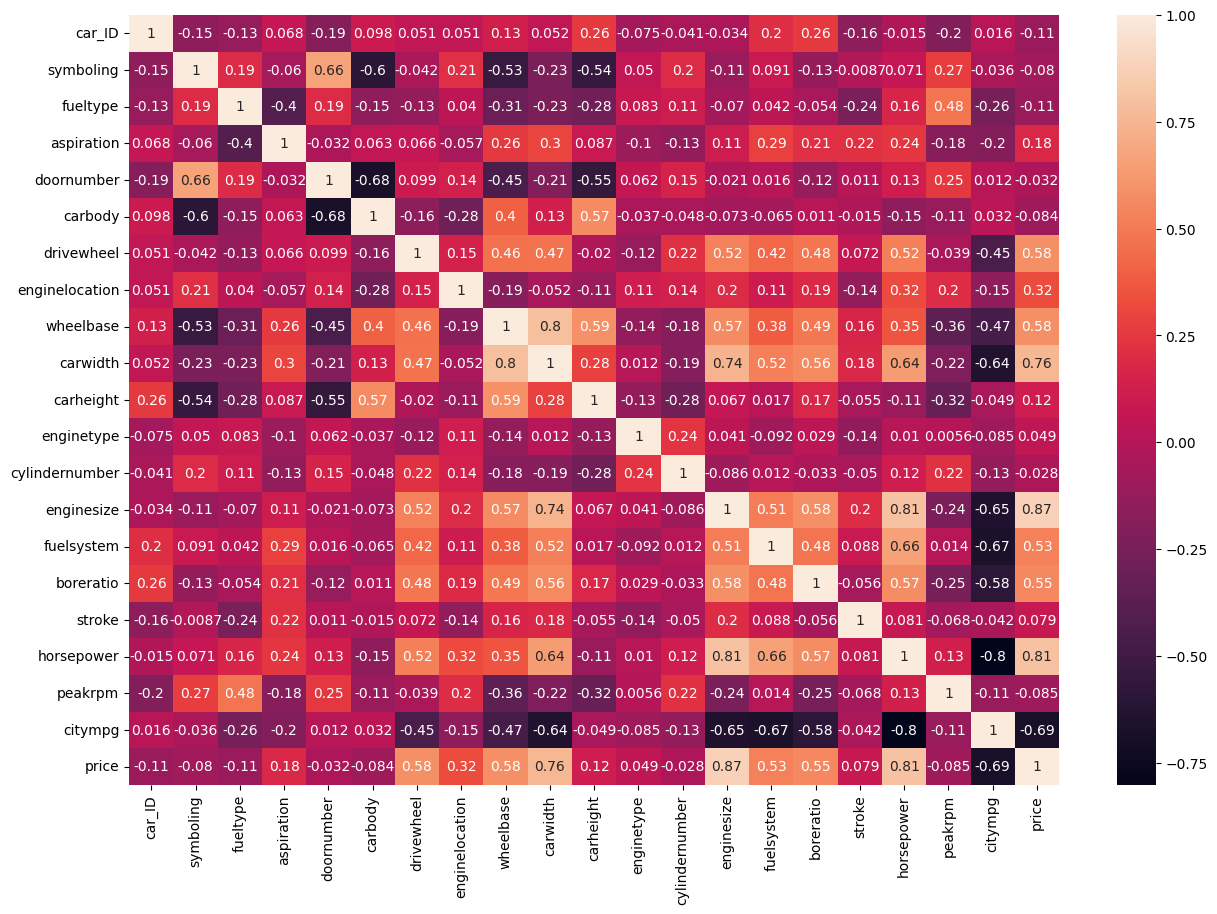

In [ ]:
plt.figure(figsize=(15,10))
sn.heatmap(data_corr2.corr(), annot=True)

In [ ]:
for col in data_corr2.columns:
    find_outliers(data_corr2, col)

car_ID has 0 outliers
symboling has 0 outliers
fueltype has 20 outliers
aspiration has 37 outliers
doornumber has 0 outliers
carbody has 6 outliers
drivewheel has 0 outliers
enginelocation has 3 outliers
wheelbase has 3 outliers
carwidth has 8 outliers
carheight has 0 outliers
enginetype has 57 outliers
cylindernumber has 46 outliers
enginesize has 10 outliers
fuelsystem has 0 outliers
boreratio has 0 outliers
stroke has 20 outliers
horsepower has 6 outliers
peakrpm has 2 outliers
citympg has 2 outliers
price has 15 outliers


## Prediction

###test on CFS threshold=0.7

In [ ]:
X = data_corr1.drop(["price", "car_ID"],axis=1)
y = data_corr1["price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm
4,2,1,0,0,3,0,0,99.4,66.4,54.3,2824,3,1,136,5,3.19,3.40,115,5500
71,-1,1,0,0,3,2,0,115.6,71.7,56.5,3740,5,0,234,5,3.46,3.10,155,4750
134,3,1,0,1,2,1,0,99.1,66.5,56.1,2707,3,2,121,5,2.54,2.07,110,5250
145,0,1,1,0,3,0,0,97.0,65.4,54.3,2510,4,2,108,5,3.62,2.64,111,4800
122,1,1,0,0,3,1,0,93.7,63.8,50.8,2191,3,2,98,1,2.97,3.23,68,5500


In [ ]:
y_train.head()

,price
4,17450.0
71,34184.0
134,15040.0
145,11259.0
122,7609.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled,y_train)
## print(model.coef_)
## print(model.intercept_)
print("Features :", X_train.columns.tolist())
print("Coefficients:", model.coef_)
print("Intercept :", model.intercept_)

Features : ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'horsepower', 'peakrpm']
Coefficients: [ 498.19557714 -211.64363034  342.9977417  -817.03260687 -871.01460519
  743.89344637 1675.47626619  919.217752   1284.65489136   21.05332564
 2097.7227388   265.52178022 -130.09249581 3164.6898143  -346.06865523
 -920.64358267 -787.95803827  638.02000844  854.76908466]
Intercept : 13304.787603658544


In [ ]:
import math
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE = ", rmse)

RMSE =  4115.91138248122


In [ ]:
actualMean = y_test.mean()

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE = ", mae)

MAE =  2680.7116342860495


In [ ]:
Percent = (mae/actualMean)*100
print(Percent)

20.36333701208785


###test on CFS threshold=0.85


In [ ]:
X = data_corr2.drop(["price", "car_ID"],axis=1)
y = data_corr2["price"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled,y_train)
## print(model.coef_)
## print(model.intercept_)
print("Features :", X_train.columns.tolist())
print("Coefficients:", model.coef_)
print("Intercept :", model.intercept_)

Features : ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carwidth', 'carheight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'horsepower', 'peakrpm', 'citympg']
Coefficients: [ 425.57879193 -562.19861178  456.32830228 -780.62417567 -791.1033437
  845.29869964 1583.84643113  873.26534051 1716.08069795  238.83403381
  107.27348532  -40.13852637 4102.90514262 -304.9553329  -921.07076583
 -809.96080717  472.36893849  772.59075205 -899.33347516]
Intercept : 13304.787603658548


In [ ]:
import math
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE = ", rmse)

RMSE =  4013.6360625462967


In [ ]:
actualMean = y_test.mean()

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE = ", mae)

MAE =  2586.6510710140587


In [ ]:
Percent = (mae/actualMean)*100
print(Percent)

19.64883011587539
